In [1]:
import numpy as np
import networkx as nx
# import tensorflow as tf
import math

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Embedding
from matplotlib.lines import Line2D
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def read_results_txt_file(filename, n_a, n_b):
        #c_a = 'red'
        #c_b = 'blue'
        c_a = '1'
        c_b = '0'
        #n_a = np.sum([1 if v['color'] == c_a else 0 for _, v in self.G.nodes.items()])
        #n_b = np.sum([1 if v['color'] == c_b else 0 for _, v in self.G.nodes.items()])

        with open(filename, 'r') as f:
            inf_a, inf_b = [], []
            for line in f:
                s = line.split()

                if s[1] == c_a and s[3] == c_b:
                    inf_a.append(float(s[2]))
                    inf_b.append(float(s[4]))
                elif s[1] == c_b and s[3] == c_a:
                    inf_b.append(float(s[2]))
                    inf_a.append(float(s[4]))
                else:
                    raise Exception('wrong format')

        inf_a, inf_b = np.array(inf_a), np.array(inf_b)
        total_fraction = 100 * (inf_a + inf_b) / (n_a + n_b)
        #diff_fraction = np.abs( (100 * inf_a / n_a) - (100 * inf_b / n_b) )
        var_fraction = np.var(np.concatenate([(100 * inf_a / n_a).reshape([-1,1]) , 
                                              (100 * inf_b / n_b).reshape([-1,1])], axis=1), axis=1)

        frac_a = 100 * inf_a / n_a
        frac_b = 100 * inf_b / n_b
    
        return np.concatenate([np.array(total_fraction).reshape([-1,1]),
                np.array(frac_a).reshape([-1,1]),
                np.array(frac_b).reshape([-1,1]),
                #np.array(diff_fraction).reshape([-1,1])], axis=1)
                np.array(var_fraction).reshape([-1,1])], axis=1)

def read_avg_results_txt_file(filename, n_a, n_b):
    res = []
    for i in ['_1', '_2', '_3', '_4', '_5']:
        res.append(read_results_txt_file(filename + i + '_results.txt', n_a, n_b))

    print(res[0].shape, ' ', res[1].shape)
        
    adv = np.mean( np.concatenate([np.expand_dims(a, 2) for a in res], axis = 2), axis = 2)
    return adv
    

In [3]:
n_a = 345
n_b = 100

bndry = '0.5'
exp_ = '4.0'
p = '0.5'
q = '0.5'

# filename = '../influence_maximization/results/rice-node2vec/rice_subset_node2vec-p' + p + '-q' + q + 'emb_random_walk_5_bndry_' + bndry + '_exp_' + exp_ + '_d30_results.txt'
# rice_rw_method = read_results_txt_file(filename, n_a, n_b)
# filename = '../influence_maximization/results/rice-node2vec/rice_subset.node2vec-p' + p + '-q' + q + 'embeddings_random_walk_5_bndry_' + bndry + '_exp_' + exp_ + '_d30'
filename = '../influence_maximization/results/rice-node2vec/me'
rice_rw_method = read_avg_results_txt_file(filename, n_a, n_b)

# filename = '../influence_maximization/results/rice-node2vec/rice_subset_greedy__results.txt'
# rice_greedy = read_results_txt_file(filename, n_a, n_b)

# filename = '../influence_maximization/results/rice-node2vec/rice-fairwalknode2vec-gendeq'
# filename = '../influence_maximization/results/rice-node2vec/rice-fairwalknode2vec-raceeq'
# filename = '../influence_maximization/results/rice-node2vec/rice-node2vec'
filename = '../influence_maximization/results/rice-node2vec/fairwalk'
rice_greedy = read_avg_results_txt_file(filename, n_a, n_b)



# filename = '../influence_maximization/results/rice-node2vec/rice_subset_node2vec-p' + p + '-q' + q + 'emb_unweighted_d30_results.txt'
# rice_unweighted = read_results_txt_file(filename, n_a, n_b)
# filename = '../influence_maximization/results/rice-node2vec/rice_subset.node2vec-p' + p + '-q' + q + 'embeddings_simpleweighted_d30'
filename = '../influence_maximization/results/rice-node2vec/node2vec'
rice_unweighted = read_avg_results_txt_file(filename, n_a, n_b)

(40, 4)   (40, 4)
(40, 4)   (40, 4)
(40, 4)   (40, 4)


In [4]:
n_seeds = np.arange(2,41,2)

red_ = '#fab3ac'
blue_ = '#29a5e3'
cyan_ = '#d2f0f7'
green_ = '#a3f77e'
gray_ = '#dbdbdb'
purple_ = '#BF55EC'
yellow_ = '#F7CA18'

In [5]:
def get_real_plots(figtype, square, fontsize, labelsize, imagesize, line_width, ylim=None):

    fig, ax = plt.subplots()

    
    ind = n_seeds - 1
    if figtype == 'total':
        ax.plot(n_seeds, rice_rw_method[ind, 0], color='blue', lw=line_width)
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_rw_method[ind, 1], color='blue', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_rw_method[ind, 2],  color='blue', lw=line_width, linestyle='dotted')
    
    if figtype == 'total':
        ax.plot(n_seeds, rice_greedy[ind, 0], color='red', lw=line_width)
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_greedy[ind, 1], color='red', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_greedy[ind, 2],  color='red', lw=line_width, linestyle='dotted')
        
    if figtype == 'total':
        ax.plot(n_seeds, rice_unweighted[ind, 0], color='green', lw=line_width)
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_unweighted[ind, 1], color='green', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_unweighted[ind, 2],  color='green', lw=line_width, linestyle='dotted')
    

#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                 Line2D([0], [0], color='green', lw=3),
#                 Line2D([0], [0], color='blue', lw=3), 
#                 Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
    if figtype == 'frac':
        custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
                Line2D([0], [0], linestyle='dotted', lw=3)]
        legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'], loc='upper left')
        plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Number of Seeds', fontsize = labelsize)
    plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    if figtype == 'total':
        fig.savefig('fig/influence_maximization_rice_node2vec/p=' + p + ',q=' + q + '/total' + added_s + '.pdf',bbox_inches='tight')
    elif figtype == 'frac':
        fig.savefig('fig/influence_maximization_rice_node2vec/p=' + p + ',q=' + q + '/fractions' + added_s + '.pdf',bbox_inches='tight')
    
    
#%%

def get_diff_plot(real, square, fontsize, labelsize, imagesize, line_width, ylim=None):
        
    fig, ax = plt.subplots()
    
    ind = n_seeds - 1
    ax.plot(n_seeds, rice_rw_method[ind, 3], linestyle='dashed', color='blue', lw=line_width)
    ax.plot(n_seeds, rice_greedy[ind, 3], linestyle='dashed', color='red', lw=line_width)
    ax.plot(n_seeds, rice_unweighted[ind, 3], linestyle='dashed', color='green', lw=line_width)
    

#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                 Line2D([0], [0], color='green', lw=3),
#                 Line2D([0], [0], color='blue', lw=3), 
#                 Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Number of Seeds', fontsize = labelsize)
    plt.ylabel('Diff in Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_rice_node2vec/p=' + p + ',q=' + q + '/diff' + added_s + '.pdf',bbox_inches='tight')


In [6]:
def get_bar_plot_all(real, bar_width, square, fontsize, labelsize, imagesize, ylim = None):
    
    
    methods = ['Gr', 'Ts', 'EmKm', 'PrEmKm']
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    
#     xg= [xx-bar_width/2 , xx, xx+bar_width/2]
#     xp = [xx - bar_width/2, 3, 3 + bar_width/2]
#     xf = [xx - bar_width/2, 5, 5 + bar_width/2]
#     xfm = [xx - bar_width/2, 7, 7 + bar_width/2]
    
    

    xg = [1- bar_width, 1, 1 + bar_width]
#     xt = [3 - bar_width, 3, 3 + bar_width]
    xe = [3 - bar_width, 3, 3 + bar_width]
    xp = [5 - bar_width, 5, 5 + bar_width]
    
    

    greedy = rice_greedy[-1, :3] # [0.16, 0.084,	0.18]    
    #Tsang = # [0.159, 0.045, 0.191]           
    EmKm = rice_unweighted[-1, :3] # [0.161,	0.136, 0.168]           
    PrEmKm = rice_rw_method[-1, :3] # [0.175,	0.11, 0.194]       
    
    fig, ax = plt.subplots()
    
    ax.bar(xg[0], greedy[0], bar_width, color = red_, edgecolor='black')
    #ax.bar(xt[0], Tsang[0], bar_width, color = cyan_, edgecolor='black')
    ax.bar(xe[0], EmKm[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xp[0], PrEmKm[0], bar_width, color = blue_, edgecolor='black')
    
    ax.bar(xg[1], greedy[1], bar_width, color = red_, hatch='//', edgecolor='black')
    #ax.bar(xt[1], Tsang[1], bar_width, color = cyan_, hatch='//', edgecolor='black')
    ax.bar(xe[1], EmKm[1], bar_width, color = green_, hatch='//', edgecolor='black')
    ax.bar(xp[1], PrEmKm[1], bar_width, color = blue_, hatch='//', edgecolor='black')
        
    ax.bar(xg[2], greedy[2], bar_width, color = red_, hatch='\\\\', edgecolor='black')
    #ax.bar(xt[2], Tsang[2], bar_width, color = cyan_, hatch='\\\\'', edgecolor='black')
    ax.bar(xe[2], EmKm[2], bar_width, color = green_, hatch='\\\\', edgecolor='black')
    ax.bar(xp[2], PrEmKm[2], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
    ax.bar(xg[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
    ax.bar(xg[1], 0, bar_width, color = gray_, hatch='//', label='Group A', edgecolor='black')
    ax.bar(xg[2], 0, bar_width, color = gray_, hatch='\\\\', label='Group B', edgecolor='black')

    plt.legend(loc='upper left')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
     
    
    
    ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
#     ax.set_axisbelow(True)
#     ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_rice_node2vec/p=' + p + ',q=' + q + '/bar' + added_s + '.pdf',bbox_inches='tight')
    

In [7]:
def get_bar_plot(real, bar_width, square, fontsize, labelsize, imagesize, ylim = None, legend_size=20):
    

    labels = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    

    xu = [2 - bar_width, 2]
    xg = [5.5 - bar_width, 5.5]
    xp = [9 - bar_width, 9]
    
    EmKm = rice_unweighted[-1, :4] # [0.161,	0.136, 0.168]
    Gr = rice_greedy[-1,:4]
    PrEmKm = rice_rw_method[-1, :4] # [0.175,	0.11, 0.194]       
    
    print(EmKm[3])
    print(Gr[3])
    print(PrEmKm[3])
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], EmKm[0], bar_width, color = purple_, edgecolor='black', label='Total Influence Percentage')
    ax.bar(xg[0], Gr[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xp[0], PrEmKm[0], bar_width, color = purple_, edgecolor='black')
    
    ax.bar(xu[1], EmKm[3], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(xg[1], Gr[3], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xp[1], PrEmKm[3], bar_width, color = yellow_, edgecolor='black')
    
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    plt.legend(loc='upper right', prop={'size': legend_size})
    
    ax.set_xticklabels(labels)
    plt.xticks([2, 5.5, 9], ['Node2Vec', 'FairWalk', 'SocialWalk'], fontsize=legend_size)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
#     ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
#     fig.savefig('fig/influence_maximization_rice_node2vec/p=' + p + ',q=' + q + '/bar' + added_s + '.pdf',bbox_inches='tight')
    fig.savefig('fig/influence_maximization_rice_node2vec/bar' + added_s + '.pdf',bbox_inches='tight')


In [8]:
def get_legend():
    params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(figsize=(6,.015))
    custom_lines = [Line2D([0], [0], color=red_, lw=3),
            Line2D([0], [0], color='green', lw=3), 
            Line2D([0], [0], color='blue', lw=3)]
    legend1 = plt.legend(custom_lines, ['Greedy',  'Node2Vec + K-medoids', 'Reweighting + Node2Vec + K-medoids'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)
    plt.gca().add_artist(legend1)
    plt.axis('off')
    fig.savefig('fig/influence_maximization_rice_node2vec/p=' + p + ',q=' + q + '/legend.pdf', bbox_inches='tight')

51.87951595303552
18.292011441252082
16.871258241966178


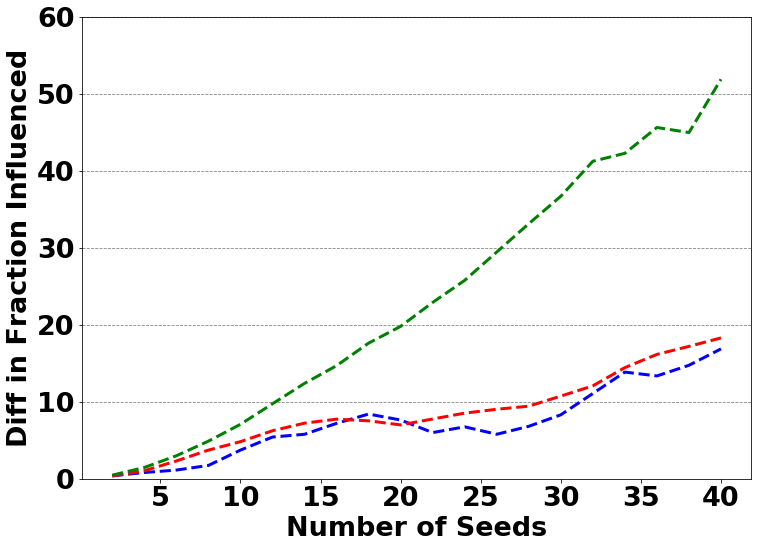

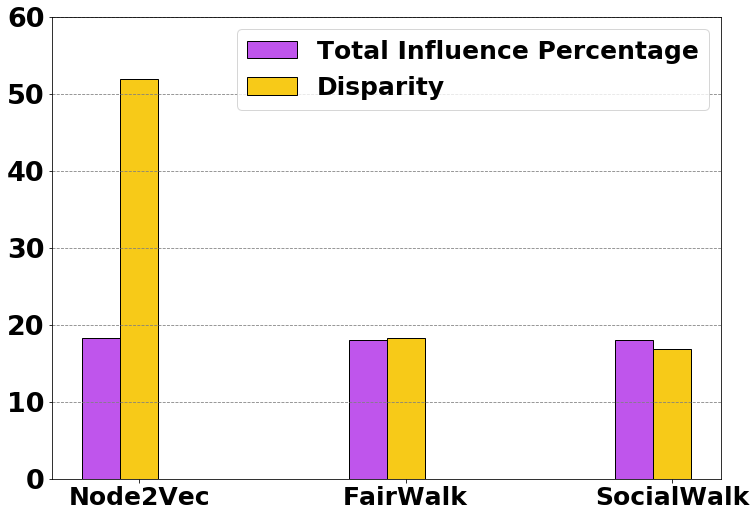

In [9]:
# Plotting the square plots
# Real Plots

label_size = 27
font_size = 24
image_size = (12, 8.5)
line_width = 3
square = True
bar_width = 0.5
# y_lim = 0.3

# get_real_plots(figtype='total', square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=23)
# get_real_plots(figtype='frac', square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=23)
get_diff_plot(real=True, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=60)
get_bar_plot(real=True, bar_width=bar_width, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=60, legend_size=25)
# get_legend()


In [10]:
(18.292011441252082 - 16.871258241966178) / 18.292011441252082

0.07767069268729117